In [1]:
# packages
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from sklearn.metrics import accuracy_score

In [2]:
# Liste des fichiers de jeux de données disponibles
dataset_files = [
    "Aggregation.txt", "Compound.txt", "Flame.txt", "Jain.txt", "Pathbased.txt", "Spiral.txt"
]

def load_dataset(file_name):
    file_path = os.path.join("data/", file_name)
    data = np.loadtxt(file_path, skiprows=7)
    return data[:, :2], data[:, 2]


In [3]:
def theoretical_bound(m, lambda_reg):
    """Calcul de la borne théorique du Théorème 2.1."""
    sigma = 1  # Hypothèse sur la constante Lipschitzienne
    return (4 * sigma ** 2 / (lambda_reg * m)) + ((8 * sigma ** 2 / lambda_reg + 1) * np.sqrt(np.log(1 / 0.05) / (2 * m)))

In [4]:

lambda_reg = 0.1  # Paramètre de régularisation (inversé dans SVM)


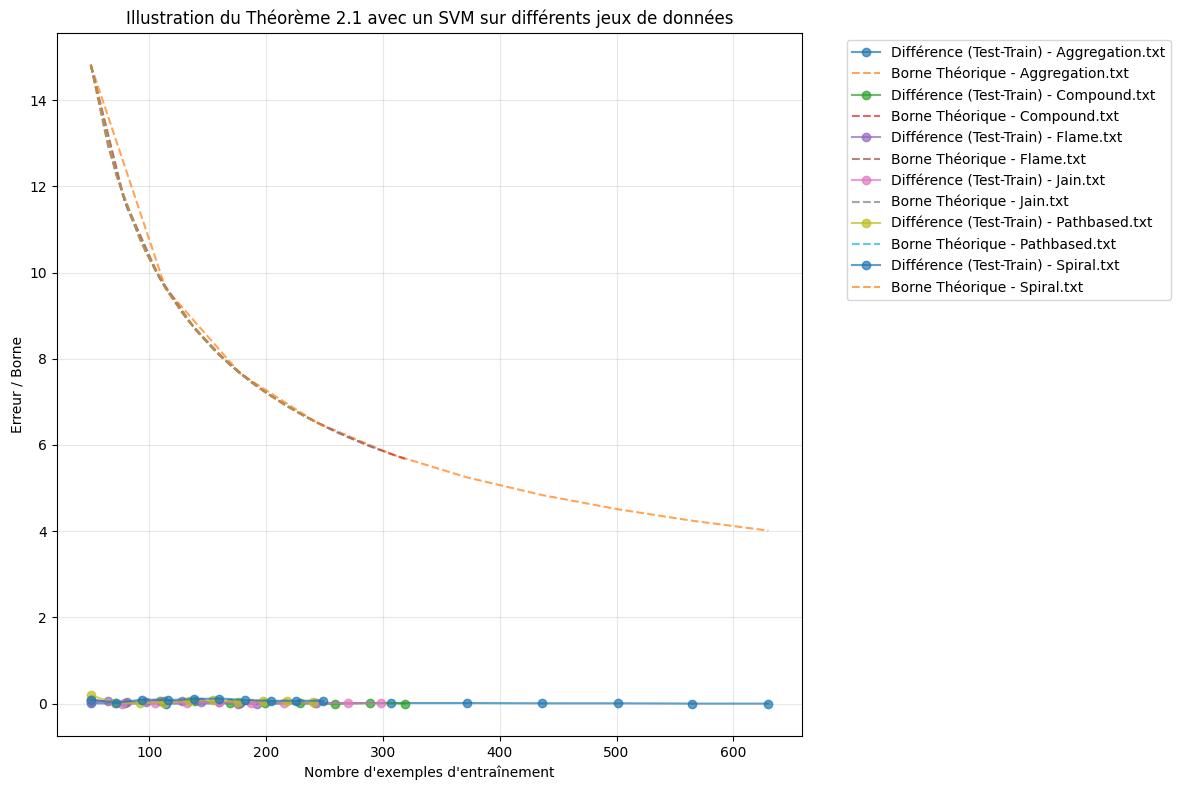

In [8]:
# Création d'une seule figure pour tous les datasets
plt.figure(figsize=(12, 8))

for idx, dataset in enumerate(dataset_files):
    # Chargement des données
    X, y = load_dataset(dataset)
    
    # Fractionnement en jeu d'entraînement et de test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Listes pour stocker les résultats
    train_sizes = np.linspace(50, len(X_train), 10, dtype=int)
    train_errors = []
    test_errors = []
    bound_values = []
    
    # Entraînement et évaluation du SVM pour différentes tailles de dataset
    for m in train_sizes:
        X_train_subset, y_train_subset = X_train[:m], y_train[:m]
        svm = SVC(kernel='linear', C=1/(2*lambda_reg))
        svm.fit(X_train_subset, y_train_subset)
        
        train_pred = svm.predict(X_train_subset)
        test_pred = svm.predict(X_test)
        
        train_error = 1 - accuracy_score(y_train_subset, train_pred)
        test_error = 1 - accuracy_score(y_test, test_pred)
        bound = theoretical_bound(m, lambda_reg)
        
        train_errors.append(train_error)
        test_errors.append(test_error)
        bound_values.append(bound)
    
    # Tracé des résultats avec des styles différents pour chaque dataset
    dataset_name = os.path.basename(dataset)
    plt.plot(train_sizes, 
             np.array(test_errors) - np.array(train_errors), 
             label=f'Différence (Test-Train) - {dataset_name}', 
             marker='o',
             linestyle='-',
             alpha=0.7)
    plt.plot(train_sizes, 
             bound_values, 
             label=f'Borne Théorique - {dataset_name}',
             linestyle='--',
             alpha=0.7)

# Configuration du graphique
plt.xlabel("Nombre d'exemples d'entraînement")
plt.ylabel("Erreur / Borne")
plt.title("Illustration du Théorème 2.1 avec un SVM sur différents jeux de données")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()  # Ajuste automatiquement la mise en page

# Affichage du graphique
plt.show()